In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import numpy as np
     

## Penjelasan Library :

### 1. Pandas
**Pandas** adalah library Python yang digunakan untuk manipulasi dan analisis data. Library ini menyediakan struktur data yang fleksibel dan efisien, seperti `DataFrame` dan `Series`, yang memudahkan pengguna untuk mengolah data. Fitur utama dari Pandas meliputi:
- **Pengolahan Data**: Memudahkan pembacaan, penulisan, dan manipulasi data dari berbagai format seperti CSV, Excel, SQL, dan JSON.
- **Indexing dan Filtering**: Memungkinkan pengguna untuk dengan mudah memilih dan memfilter data berdasarkan kriteria tertentu.
- **Pengelompokan dan Agregasi**: Memungkinkan pengguna untuk mengelompokkan data berdasarkan kolom tertentu dan melakukan agregasi (misalnya, sum, mean) pada kelompok tersebut.
- **Manipulasi Waktu**: Memiliki fitur yang kuat untuk menangani data waktu (time series).

### 2. Matplotlib
**Matplotlib** adalah library untuk membuat visualisasi data dalam bentuk grafik 2D di Python. Dengan Matplotlib, pengguna dapat membuat berbagai jenis grafik, seperti:
- **Grafik Garis**: Menampilkan data dalam bentuk garis yang menghubungkan titik-titik.
- **Grafik Batang**: Menggunakan batang vertikal atau horizontal untuk membandingkan nilai dari kategori yang berbeda.
- **Grafik Pie**: Menunjukkan proporsi dari total.
- **Scatter Plot**: Menampilkan hubungan antara dua variabel dengan titik-titik.
Matplotlib sangat fleksibel dan dapat disesuaikan, sehingga cocok untuk menghasilkan grafik yang kompleks.

### 3. Sastrawi
**Sastrawi** adalah library Python untuk pemrosesan bahasa alami (Natural Language Processing - NLP) yang ditujukan untuk bahasa Indonesia. Fitur utama dari Sastrawi meliputi:
- **Stemming**: Mengurangi kata ke bentuk dasarnya (stem), yang penting dalam analisis teks untuk mengurangi variasi kata.
- **Tokenization**: Memecah teks menjadi kata atau frasa.
- **Stopwords Removal**: Menghapus kata-kata umum yang tidak memberikan makna signifikan dalam analisis, seperti "dan", "atau", dan sebagainya.
- **Pengolahan Teks**: Memudahkan pemrosesan dan analisis teks dalam bahasa Indonesia.

### 4. WordCloud
**WordCloud** adalah library Python yang digunakan untuk membuat visualisasi dari kata-kata dalam bentuk awan kata. Fitur utama dari WordCloud adalah:
- **Visualisasi Frekuensi Kata**: Menampilkan kata-kata yang paling sering muncul dalam teks, dengan ukuran font yang menunjukkan frekuensi kemunculannya.
- **Kustomisasi**: Pengguna dapat menyesuaikan tampilan awan kata dengan warna, bentuk, dan ukuran yang berbeda.
- **Fleksibilitas**: Dapat digunakan dengan teks dari berbagai sumber dan dapat dikombinasikan dengan library visualisasi lain seperti Matplotlib untuk menampilkan hasil.

### 5. Numpy
**NumPy** adalah library fundamental untuk komputasi ilmiah di Python. Ini menyediakan dukungan untuk array multidimensi dan berbagai fungsi matematis untuk operasi pada array tersebut. Fitur utama dari NumPy meliputi:
- **Array Multidimensi**: Memungkinkan pengguna untuk bekerja dengan array yang lebih efisien daripada list Python standar.
- **Fungsi Matematis**: Menyediakan berbagai fungsi untuk melakukan operasi matematis, statistik, dan aljabar linier.
- **Integrasi dengan Library Lain**: Digunakan sebagai dasar untuk banyak library analisis teks dalam bahasa Indonesia.

## Crawling Data

In [3]:
df = pd.read_csv('data_real.csv', index_col=0)
df.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [4]:
df_copy = df.copy()

## Labeling

In [5]:
label = [] #Sebuah list kosong label diinisialisasi untuk menyimpan hasil kategorisasi.
for index, row in df_copy.iterrows(): #Kode ini menggunakan .iterrows() untuk mengiterasi setiap baris dalam DataFrame df_copy. row mewakili setiap baris.
  if row["Rating"] == 1 or row["Rating"] == 2: #Jika nilai pada kolom "Rating" adalah 1 atau 2, maka 0 ditambahkan ke list label, jika rating adalah 3 atau lebih, maka 1 ditambahkan.
    label.append(0)
  else :
    label.append(1)

df_copy["label"] = label #Setelah proses iterasi selesai, list label yang telah diisi dengan 0 dan 1 ditambahkan sebagai kolom baru ke dalam DataFrame df_copy dengan nama "label".

In [6]:

df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


## Preprocessing

In [7]:
# Mengubah text menjadi lower
df_copy['Ulasan'] = df_copy['Ulasan'].str.lower()

In [8]:
norm = {" dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: normalisasi(x))
     

In [9]:
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan tidak sesuai dengan yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman dan respon super cepat. tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


## Stopwords

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: stopword(x))
df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan sesuai yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


## Tokenize

In [11]:
tokenized = df_copy['Ulasan'].apply(lambda x:x.split())
tokenized

0                       [pesanan, sesuai, yg, d, gambar]
1      [pengiriman, respon, super, cepat., tpi, baran...
2                 [barang, yg, dikirim, sesuai, pesanan]
3      [php,, bilang, isi, diseskripsi, pas, dipesen,...
4      [barang, jelek, copot&#34;, terus, tmpat, taro...
                             ...                        
995           [bagus, memuaskan., packing, bagus, cepat]
996             [mantap, pengiriman, cepat, rekomen, ed]
997                        [pengiriman, cepat., lumayan]
998              [belom, dicoba, semoga, oke, barangnya]
999    [barang, cukup, bagus,, respon, bagus., gak, m...
Name: Ulasan, Length: 1925, dtype: object

In [12]:

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Ulasan):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in Ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head()

pesan sesuai yg d gambar
kirim respon super cepat tpi barang sesuai gambar tidak kuat tembus jok motor
barang yg kirim sesuai pesan
php bilang isi skripsi pas sen beda mubajir rp50 000 nyata isi ga cocok
barang jelek copot 34 terus tmpat taro isi
beli staples gak jual isi sekali pake ckckck
baik kalau mau ngirim barang periksa dulu gan kondisi barang layak apa gak gitu loh isi karat semua
produk sesuai order prohex yg kirim
barang sdh terima
bisa buat masang jok gak pake
barang datang cacat gak guna harus sblum kirim di coba dulu
kecewa baru dipakey isiya kluar 2 3 buah papan nempel
barang kurang bagus kirim pakai pos lama sekali
hasil staples rapat bidang mungkin produk cacat hadeeuh
barang standart n biasa aja kurang bagus 
barang rusak kecewa berat
beli 5 bs pakai semua
straples nya gk bs dipake udh coba berkali2 bwt pasang jaring nyamuk straples tembak bah triplek aja gk nembus udh harus diketok2 palu lgi 
mungkin harga juga jadi susah dipake hehe staples gak nancep sampe oenuh
gag

,Ulasan
0,pesan sesuai yg d gambar
1,kirim respon super cepat tpi barang sesuai gam...
2,barang yg kirim sesuai pesan
3,php bilang isi skripsi pas sen beda mubajir rp...
4,barang jelek copot 34 terus tmpat taro isi


## Menggabungkan kedua attribut

In [36]:
at1 = pd.read_csv('databersih2.csv')
at2 = pd.read_csv('data_real.csv')
att2 = at2['label']

result = pd.concat([at1, att2], axis=1)

In [35]:
result.head()

,Ulasan,label
0,pesan sesuai yg d gambar,0
1,kirim respon super cepat tpi barang sesuai gam...,0
2,barang yg kirim sesuai pesan,0
3,php bilang isi skripsi pas sen beda mubajir rp...,0
4,barang jelek copot 34 terus tmpat taro isi,0


## Menghitung Kata Dengan TF-IDF

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [16]:
Ulasan = result['Ulasan']
     

In [17]:
Ulasan.isnull().sum()

6

In [18]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [19]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

2853


In [20]:
term_fit.vocabulary_

{'pesan': 1979,
 'sesuai': 2319,
 'yg': 2840,
 'gambar': 913,
 'kirim': 1305,
 'respon': 2158,
 'super': 2494,
 'cepat': 566,
 'tpi': 2685,
 'barang': 301,
 'tidak': 2632,
 'kuat': 1376,
 'tembus': 2573,
 'jok': 1167,
 'motor': 1671,
 'php': 1985,
 'bilang': 409,
 'isi': 1105,
 'skripsi': 2378,
 'pas': 1919,
 'sen': 2295,
 'beda': 349,
 'mubajir': 1683,
 'rp50': 2188,
 '000': 1,
 'nyata': 1817,
 'ga': 899,
 'cocok': 596,
 'jelek': 1147,
 'copot': 615,
 '34': 69,
 'terus': 2597,
 'tmpat': 2659,
 'taro': 2547,
 'beli': 360,
 'staples': 2451,
 'gak': 910,
 'jual': 1174,
 'sekali': 2271,
 'pake': 1897,
 'ckckck': 582,
 'baik': 276,
 'kalau': 1204,
 'mau': 1584,
 'ngirim': 1763,
 'periksa': 1973,
 'dulu': 817,
 'gan': 918,
 'kondisi': 1345,
 'layak': 1426,
 'apa': 217,
 'gitu': 956,
 'loh': 1478,
 'karat': 1224,
 'semua': 2294,
 'produk': 2047,
 'order': 1861,
 'prohex': 2051,
 'sdh': 2251,
 'terima': 2589,
 'bisa': 413,
 'buat': 485,
 'masang': 1574,
 'datang': 668,
 'cacat': 521,
 'guna':

In [21]:
# Kolom pertama ini berarti jumlah dokumen
# Kolom kedua berarti letak kata nya
# Kolom ketiga berarti hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print(term_frequency_all)

  (0, 913)	1
  (0, 1979)	1
  (0, 2319)	1
  (0, 2840)	1
  (1, 301)	1
  (1, 566)	1
  (1, 913)	1
  (1, 1167)	1
  (1, 1305)	1
  (1, 1376)	1
  (1, 1671)	1
  (1, 2158)	1
  (1, 2319)	1
  (1, 2494)	1
  (1, 2573)	1
  (1, 2632)	1
  (1, 2685)	1
  (2, 301)	1
  (2, 1305)	1
  (2, 1979)	1
  (2, 2319)	1
  (2, 2840)	1
  (3, 1)	1
  (3, 349)	1
  (3, 409)	1
  :	:
  (1924, 635)	1
  (1924, 734)	1
  (1924, 897)	1
  (1924, 910)	2
  (1924, 918)	1
  (1924, 958)	1
  (1924, 986)	1
  (1924, 1023)	1
  (1924, 1456)	1
  (1924, 1565)	1
  (1924, 1707)	1
  (1924, 1796)	1
  (1924, 1901)	1
  (1924, 1922)	1
  (1924, 1992)	1
  (1924, 2158)	1
  (1924, 2227)	1
  (1924, 2251)	1
  (1924, 2282)	1
  (1924, 2368)	1
  (1924, 2510)	3
  (1924, 2572)	1
  (1924, 2649)	1
  (1924, 2684)	1
  (1924, 2770)	1


In [22]:
ulasan_tf = Ulasan[1]
print(ulasan_tf)
     

kirim respon super cepat tpi barang sesuai gambar tidak kuat tembus jok motor


In [23]:
term_frequency = term_fit.transform([ulasan_tf])
print(term_frequency)

  (0, 301)	1
  (0, 566)	1
  (0, 913)	1
  (0, 1167)	1
  (0, 1305)	1
  (0, 1376)	1
  (0, 1671)	1
  (0, 2158)	1
  (0, 2319)	1
  (0, 2494)	1
  (0, 2573)	1
  (0, 2632)	1
  (0, 2685)	1


In [24]:
dokumen = term_fit.transform(Ulasan)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[7.87005341 7.87005341 7.87005341 ... 7.87005341 7.87005341 7.87005341]
  (0, 2685)	0.32879577987472103
  (0, 2632)	0.2440555057670612
  (0, 2573)	0.39340407545106876
  (0, 2494)	0.32473353113837955
  (0, 2319)	0.13201395188998563
  (0, 2158)	0.19890964301921868
  (0, 1671)	0.39340407545106876
  (0, 1376)	0.310957662105142
  (0, 1305)	0.1486041020556212
  (0, 1167)	0.39340407545106876
  (0, 913)	0.2258690373815714
  (0, 566)	0.15935944346969055
  (0, 301)	0.10195709210879775


In [25]:
train_s0 = df_copy[df_copy["label"] == 0]

In [26]:
train_s0["Ulasan"] = train_s0["Ulasan"].fillna("tidak ada komentar")
     

C:\Users\ARUM MAULIA\AppData\Local\Temp\ipykernel_20528\520807967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan"] = train_s0["Ulasan"].fillna("tidak ada komentar")


In [27]:
train_s0.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan sesuai yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [28]:
from wordcloud import WordCloud

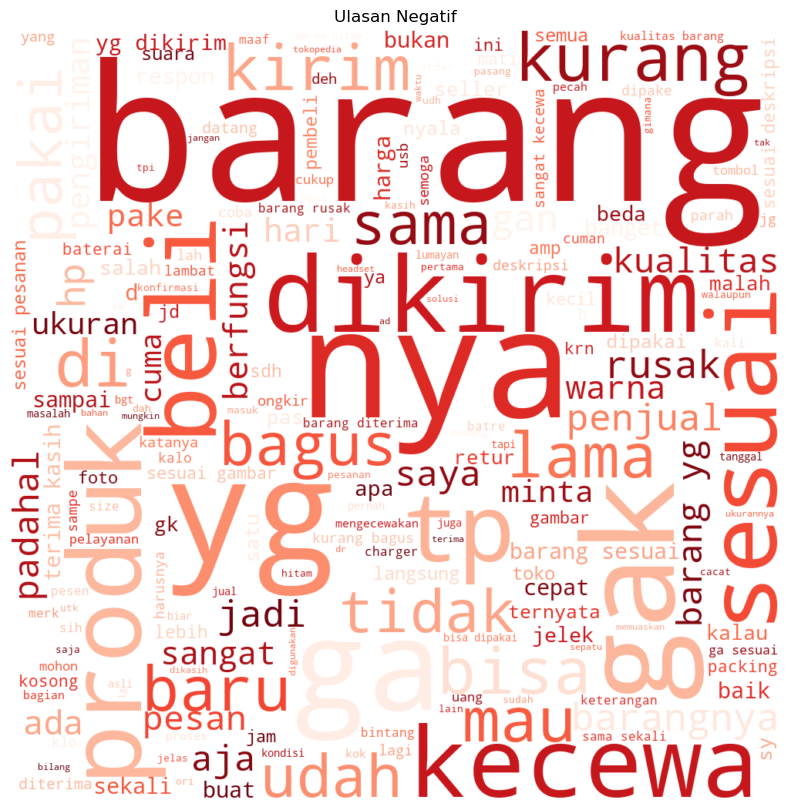

In [29]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [30]:
train_s1 = df_copy[df_copy["label"] == 1]

In [31]:

train_s1["Ulasan"] = train_s1["Ulasan"].fillna("Tidak ada komentar")

C:\Users\ARUM MAULIA\AppData\Local\Temp\ipykernel_20528\2725543637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan"] = train_s1["Ulasan"].fillna("Tidak ada komentar")


In [32]:
train_s1.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,1,barang sesuai pesanan cepat,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...,1
1,2,barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
2,3,paket rapi...mantap....cepat....sampe tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
3,4,saya puas barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...,1
4,5,responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...,1


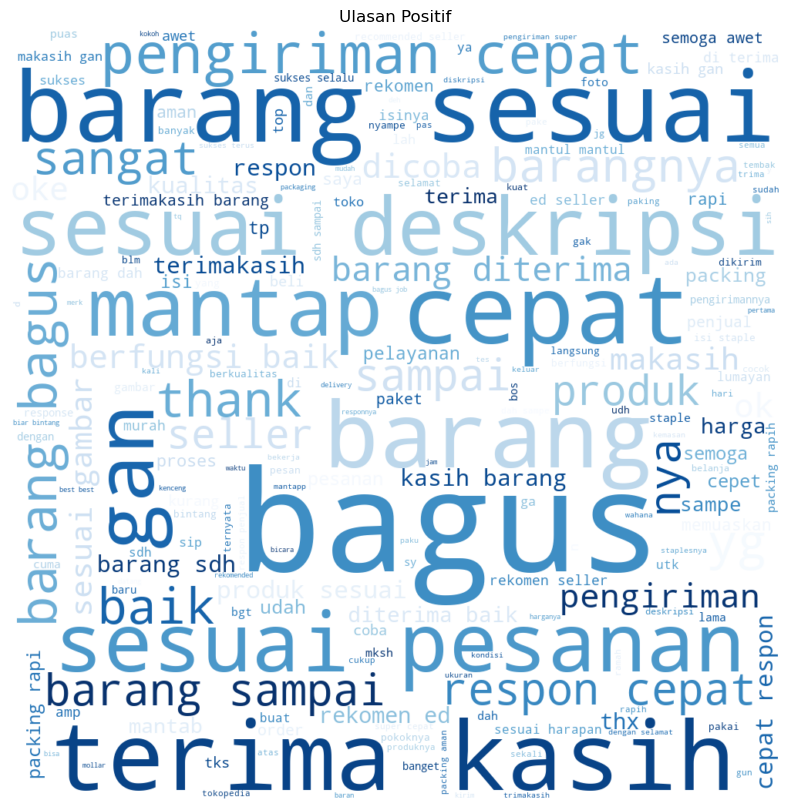

In [33]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

C:\Users\ARUM MAULIA\AppData\Local\Temp\ipykernel_20528\1423334625.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(df_copy["label"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

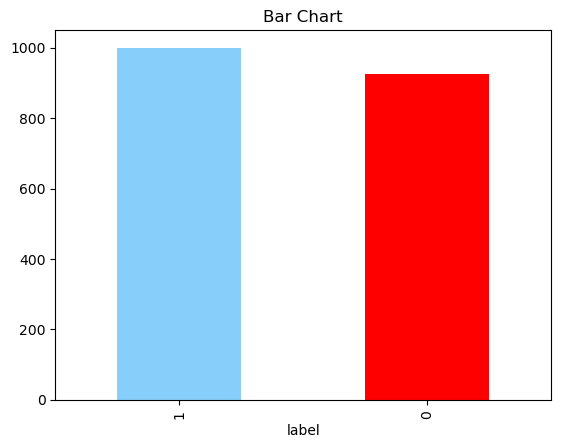

In [37]:
sentimen_data = pd.value_counts(df_copy["label"], sort=True)
sentimen_data.plot(kind='bar', color=['lightskyblue', 'red'])
plt.title("Bar Chart")
plt.show

## SPLIT DATA 

In [38]:
result['Ulasan'] = result['Ulasan'].fillna("Tidak ada komentar")

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(result['Ulasan'], result['label'], 
                                                    test_size=0.1, stratify=result['label'], random_state=30)
     

In [40]:
import numpy as np

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [42]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1732, 2716)
(193, 2716)


In [43]:
X_train = X_train.toarray()
     

In [44]:
X_test = X_test.toarray()

## NAIVE BAYES 

In [45]:
from sklearn.naive_bayes import gaussianNB

nb = GaussianNB()

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}
gscv_nb = GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv = cv_method,
                        verbose = 1, 
                        scoring = 'accuracy')

gscv_nb.fit(X_train, y_train)
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.005336699231206307}

In [48]:
nb = GaussianNB(var_smoothing=0.005336699231206307)

In [49]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.005336699231206307)

In [50]:
y_pred_nb = nb.predict(X_test)
     

## CONFUSION MATRIX

In [55]:
import sklearn
print(sklearn.__version__)


1.2.2


In [5]:
from sklearn.metrics import confusion matrix
from sklearn.metrics import classification report, roc curve, RocCurveDisplay #

SyntaxError: invalid syntax (2535670679.py, line 1)

In [6]:
print('----- confusion matrix ------')
print(confusion_matrix(y_test, y_pred_nb))

print('----- classification report -----')
print(classification_report(y_test, y_pred_nb))

----- confusion matrix ------


NameError: name 'confusion_matrix' is not defined